In [1]:
import QuantumRingsLib
from QuantumRingsLib import QuantumRegister, AncillaRegister, ClassicalRegister, QuantumCircuit
from QuantumRingsLib import QuantumRingsProvider
from QuantumRingsLib import job_monitor
from QuantumRingsLib import JobStatus
from matplotlib import pyplot as plt
import numpy as np

In [2]:
  
provider = QuantumRingsProvider(token ='rings-200.cfGvWMxnqvm3Mhbp2ta78Xyls2C1NUHi', name='m23iqt008@iitj.ac.in')
backend = provider.get_backend("scarlet_quantum_rings")
numberofqubits = 5
shots = 100

provider.active_account()

{'name': 'm23iqt008@iitj.ac.in',
 'token': 'rings-200.cfGvWMxnqvm3Mhbp2ta78Xyls2C1NUHi',
 'max_qubits': '200'}

In [5]:
q = QuantumRegister(numberofqubits , 'q')
c = ClassicalRegister(numberofqubits , 'c')
qc = QuantumCircuit(q, c)


qc.h(0);
for i in range (qc.num_qubits - 1):
    qc.cnot(i, i + 1);

qc.measure_all();


In [6]:
job = backend.run(qc, shots)
job_monitor(job)



TypeError: run(): incompatible function arguments. The following argument types are supported:
    1. (self: QuantumRingsLib.BackendV2, arg0: QuantumCircuit, **kwargs) -> QuantumRingsLib.JobV1

Invoked with: Backend(backend_name = scarlet_quantum_rings,backend_version = 0.9.0,online_date = 9/12/2023,num_qubits = 200),        ┌───┐                    ┌───┐                     
q[0]: ■┤ H ├──■─────────────────┤ M ├──────────────────── 
       └───┘┌─┴─┐               └─╥─┘┌───┐                
q[1]: ■─────┤ X ├──■──────────────║──┤ M ├─────────────── 
            └───┘┌─┴─┐            ║  └─╥─┘┌───┐           
q[2]: ■──────────┤ X ├──■─────────║────║──┤ M ├────────── 
                 └───┘┌─┴─┐       ║    ║  └─╥─┘┌───┐      
q[3]: ■───────────────┤ X ├──■────║────║────║──┤ M ├───── 
                      └───┘┌─┴─┐  ║    ║    ║  └─╥─┘┌───┐ 
q[4]: ■────────────────────┤ X ├──║────║────║────║──┤ M ├ 
                           └───┘  ║    ║    ║    ║  └─╥─┘ 
c: 5/ ■═══════════════════════════╩════╩════╩════╩════╩══ 
                                  0    1    2    3    4   
, 100

In [ ]:
result = job.result()
counts = result.get_counts()

NameError: name 'counts' is not defined

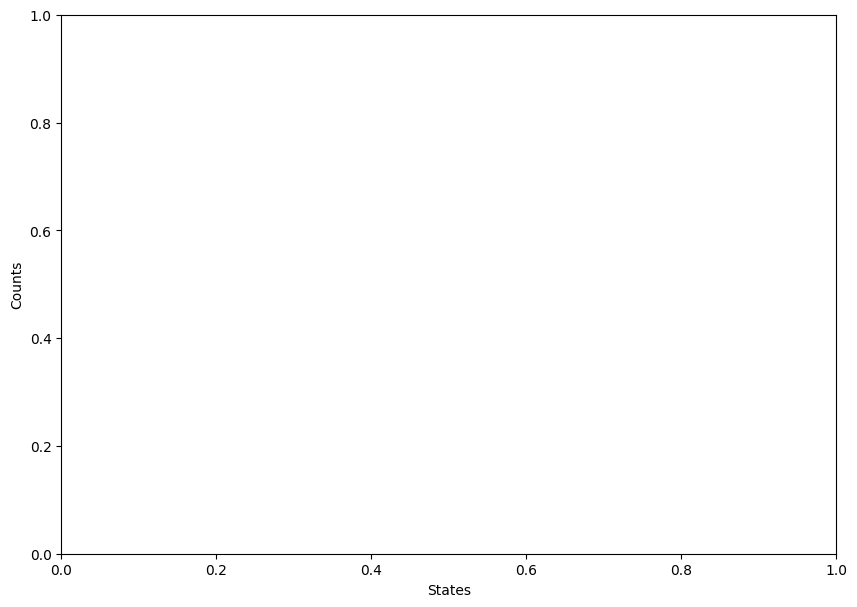

In [4]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.xlabel("States")
plt.ylabel("Counts")
mylist = [key for key, val in counts.items() for _ in range(val)]
unique, inverse = np.unique(mylist, return_inverse=True)
bin_counts = np.bincount(inverse)
plt.bar(unique, bin_counts)
maxFreq = max(counts.values())
plt.ylim(ymax=np.ceil(maxFreq / 10) * 10 if maxFreq % 10 else maxFreq + 10)
# Show plot
plt.show()